# Basic Imports

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', 100)

import string
string.punctuation

import re

import nltk
stopword = nltk.corpus.stopwords.words('english')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_validate

from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn import metrics

# Read data using Pandas

In [2]:
fullcorpus = pd.read_csv('/Users/monsharm6/Projects/NaturalLanguageProcessing/UrduDataset/RomanUrduDataSet.csv', 
                         sep=',', header=None)

In [3]:
fullcorpus.head()

,0,1,2
0,Sai kha ya her kisi kay bus ki bat nhi hai lakin main ki hal kal bi Aj aur aj bi sirf Aus say bus,Positive,NaN
1,sahi bt h,Positive,NaN
2,"Kya bt hai,",Positive,NaN
3,Wah je wah,Positive,NaN
4,Are wha kaya bat hai,Positive,NaN


In [4]:
fullcorpus.columns = ['body_text', 'label', 'junk']

In [5]:
fullcorpusI = fullcorpus.drop(['junk'], axis=1)

In [6]:
fullcorpusI.loc[fullcorpusI['label'] == 'Positive'].count()

body_text    6013
label        6013
dtype: int64

In [7]:
fullcorpusI.shape

(20229, 2)

In [7]:
fullcorpusI.loc[fullcorpusI['label'] == 'Negative'].count()

body_text    5286
label        5286
dtype: int64

In [8]:
fullcorpusI.loc[fullcorpusI['label'] == 'Neutral'].count()

body_text    8928
label        8929
dtype: int64

In [9]:
fullcorpusI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20229 entries, 0 to 20228
Data columns (total 2 columns):
body_text    20228 non-null object
label        20229 non-null object
dtypes: object(2)
memory usage: 316.2+ KB


In [10]:
fullcorpusI['body_text'] = fullcorpusI['body_text'].astype(str)

# Remove punctuation

In [11]:
def remove_punctuation(text):
    # Iterate over characters in text and return character if it is not in string.punctuation
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

In [12]:
fullcorpusI['body_text_clean'] = fullcorpusI['body_text'].apply(lambda x: remove_punctuation(x))
fullcorpusI.head()

,body_text,label,body_text_clean
0,Sai kha ya her kisi kay bus ki bat nhi hai lakin main ki hal kal bi Aj aur aj bi sirf Aus say bus,Positive,Sai kha ya her kisi kay bus ki bat nhi hai lakin main ki hal kal bi Aj aur aj bi sirf Aus say bus
1,sahi bt h,Positive,sahi bt h
2,"Kya bt hai,",Positive,Kya bt hai
3,Wah je wah,Positive,Wah je wah
4,Are wha kaya bat hai,Positive,Are wha kaya bat hai


# Tokenization

In [13]:
# \W+ regular expression will split a word based on one or more non word characters. It will split on white 
# spaces, special characters 

def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

In [14]:
fullcorpusI['body_text_tokenize'] = fullcorpusI['body_text_clean'].apply(lambda x: tokenize(x))

In [15]:
fullcorpusI.head()

,body_text,label,body_text_clean,body_text_tokenize
0,Sai kha ya her kisi kay bus ki bat nhi hai lakin main ki hal kal bi Aj aur aj bi sirf Aus say bus,Positive,Sai kha ya her kisi kay bus ki bat nhi hai lakin main ki hal kal bi Aj aur aj bi sirf Aus say bus,"[Sai, kha, ya, her, kisi, kay, bus, ki, bat, nhi, hai, lakin, main, ki, hal, kal, bi, Aj, aur, a..."
1,sahi bt h,Positive,sahi bt h,"[sahi, bt, h]"
2,"Kya bt hai,",Positive,Kya bt hai,"[Kya, bt, hai]"
3,Wah je wah,Positive,Wah je wah,"[Wah, je, wah]"
4,Are wha kaya bat hai,Positive,Are wha kaya bat hai,"[Are, wha, kaya, bat, hai]"


# Remove stopwords

In [17]:
def remove_stopwords(tokenize_list):
    text = [word for word in tokenize_list if word not in stopword]
    return text

In [18]:
fullcorpusI['body_text_nostop'] = fullcorpusI['body_text_tokenize'].apply(lambda x: remove_stopwords(x))

In [19]:
fullcorpusI.head()

,body_text,label,body_text_clean,body_text_tokenize,body_text_nostop
0,Sai kha ya her kisi kay bus ki bat nhi hai lakin main ki hal kal bi Aj aur aj bi sirf Aus say bus,Positive,Sai kha ya her kisi kay bus ki bat nhi hai lakin main ki hal kal bi Aj aur aj bi sirf Aus say bus,"[Sai, kha, ya, her, kisi, kay, bus, ki, bat, nhi, hai, lakin, main, ki, hal, kal, bi, Aj, aur, a...","[Sai, kha, ya, kisi, kay, bus, ki, bat, nhi, hai, lakin, main, ki, hal, kal, bi, Aj, aur, aj, bi..."
1,sahi bt h,Positive,sahi bt h,"[sahi, bt, h]","[sahi, bt, h]"
2,"Kya bt hai,",Positive,Kya bt hai,"[Kya, bt, hai]","[Kya, bt, hai]"
3,Wah je wah,Positive,Wah je wah,"[Wah, je, wah]","[Wah, je, wah]"
4,Are wha kaya bat hai,Positive,Are wha kaya bat hai,"[Are, wha, kaya, bat, hai]","[Are, wha, kaya, bat, hai]"


# Vectorizing 
** Process of encoding text as integers to create feature vectors 

## Apply count vectorizer

In [16]:
# \W+ regular expression will split a word based on one or more non word characters. It will split on white 
# spaces, special characters

def clean_text(text):
    text = "".join([char.lower() for char in text if char not in string.punctuation])
    tokens = re.split('\W+', text)
    return tokens

In [17]:
count_vect = CountVectorizer(analyzer=clean_text)
X_counts = count_vect.fit_transform(fullcorpusI['body_text'])
## Fit only trains the vectorizer that are in the corpus
# fit_transform will actually vectorize the dataset
print(X_counts.shape)
print(count_vect.get_feature_names())

(20229, 33263)
['', '0', '000142', '0012', '00923139933050', '03002341366', '03004328290', '0300929358603339293586', '03016958700', '03044810718', '03045860231', '03097065975', '03424926847', '034415', '04', '08', '09', '09112016', '0esa', '0nce', '0r', '1', '10', '100', '1000', '10000000', '1000000000', '100100', '101', '102', '1022', '104', '10405', '108', '109', '10960', '10adhak', '10days', '10g', '10mbps', '10saal', '10th', '11', '110', '1100', '1111bar', '1112', '1127', '112929', '1130', '113020', '113320', '11365', '1140', '1145', '115', '119', '11953', '11tasbih', '11th', '11udc', '12', '120', '1200', '12000', '120mm', '122', '124', '125', '126', '12616', '127am', '1286wan', '129', '1299', '12baje', '12june', '12lakh', '13', '130', '1300', '131', '132', '1325', '133th', '135', '1350', '136', '137', '138', '139', '14', '140', '1403750', '14331', '144', '148', '14assistant', '14th', '15', '150', '1500', '15000', '150000', '150gaz', '154', '15400', '15525', '1571', '15din', '15th'

### Vectorizer outputs sparse matrix

** Sparse Matrix: A matrix in which most entries are 0. In the interest of efficient storage, a sparse matrix will be stored by only storing the locations of the non-zero elements. 

** X_counts is a document term matrix that contains the number of text messages as rows and distinct words contained in them as columns. The number represents the number of times each word occured in the text. 

In [18]:
X_counts_df = pd.DataFrame(X_counts.toarray())

In [19]:
X_counts_df.head()

,0,1,2,3,4,5,6,7,8,9,...,33253,33254,33255,33256,33257,33258,33259,33260,33261,33262
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
X_counts_df.columns = count_vect.get_feature_names()

## Vectorizing raw data: N-Grams

**N-Grams** - Creates a document term matrix where ther counts still occupy the cell but instead of the columns representing single terms, they represent all combinations of adjacent words of length in your text.  

For example: "NLP is an interesting topic". 

| n | Name | Tokens |
|---|------|--------|
| 2 | Bigram | ["nlp is"], ["is an"], ["an interesting"], ["interesting topic"] |
| 3 | Trigram | ["nlp is an"], ["is an interesting"], ["an interesting topic"] |
| 4 | four-gram | ["nlp is an intersting"], ["is an interesting topic"] |

### Applying count vectorizer with N-Gram

In [21]:
n_gram_vect = CountVectorizer(ngram_range=(2,2))
# Count vectorizer will search in the range 2,2, meaning only bi-grams. If the range is 1,2, then it will look 
# for unigrams and bigrams. If the range is 1,3 then it will start with unigrams until trigrams including bigrams. 
X_counts_ngram = n_gram_vect.fit_transform(fullcorpusI['body_text'])
print(X_counts_ngram.shape)

(20229, 157171)


In [29]:
X_count_feat = pd.concat([fullcorpusI['body_length'], fullcorpusI['punct%'], pd.DataFrame(X_counts_ngram.toarray())], axis=1)

# Tfidf Vectorizer

** Inverse Document Frequency Weighting **

$w_{i,j}$ = $tf_{i,j}$ $\times$ log$\frac{N}{df_{i}}$

* $tf_{i,j}$: Number of times the word i occured in word j divided by the total number of terms (words) in j 
* $df_{i}$: Number of documents containing i
* N: Total number of documents

In [30]:
tfidf_Vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_Vect.fit_transform(fullcorpusI['body_text'])
print(X_tfidf.shape)

(20229, 33263)


In [34]:
X_tfidf_feat = pd.concat([fullcorpusI['body_length'], fullcorpusI['punct%'], pd.DataFrame(X_tfidf.toarray())], axis=1)

# Feature Engineering

## Create a feature for text message length

* Working under the hypothesis that negative messages are longer than positive messages. 

In [23]:
fullcorpusI['body_length'] = fullcorpusI['body_text'].apply(lambda x: len(x) - x.count(" "))

In [24]:
fullcorpusI[fullcorpusI['body_length'] < 0].head()

,body_text,label,body_text_clean,body_text_tokenize,body_length


In [30]:
fullcorpusI.head(100)

,body_text,label,body_text_clean,body_text_tokenize,body_length
0,Sai kha ya her kisi kay bus ki bat nhi hai lakin main ki hal kal bi Aj aur aj bi sirf Aus say bus,Positive,Sai kha ya her kisi kay bus ki bat nhi hai lakin main ki hal kal bi Aj aur aj bi sirf Aus say bus,"[Sai, kha, ya, her, kisi, kay, bus, ki, bat, nhi, hai, lakin, main, ki, hal, kal, bi, Aj, aur, a...",73
1,sahi bt h,Positive,sahi bt h,"[sahi, bt, h]",7
2,"Kya bt hai,",Positive,Kya bt hai,"[Kya, bt, hai]",9
3,Wah je wah,Positive,Wah je wah,"[Wah, je, wah]",8
4,Are wha kaya bat hai,Positive,Are wha kaya bat hai,"[Are, wha, kaya, bat, hai]",16
5,Wah kya baat likhi,Positive,Wah kya baat likhi,"[Wah, kya, baat, likhi]",15
6,Wha Itni sari khubiya,Positive,Wha Itni sari khubiya,"[Wha, Itni, sari, khubiya]",18
7,Itni khubiya,Positive,Itni khubiya,"[Itni, khubiya]",11
8,Ya allah rehm farma hm sab pe or zalimo ko hidayat de ameen,Positive,Ya allah rehm farma hm sab pe or zalimo ko hidayat de ameen,"[Ya, allah, rehm, farma, hm, sab, pe, or, zalimo, ko, hidayat, de, ameen]",47
9,Please Everyone AllAh S.w.T ka naam hAmesha Bary Lawzo main Likha kary Wo he Zaat sUb say Bari Hey,Positive,Please Everyone AllAh SwT ka naam hAmesha Bary Lawzo main Likha kary Wo he Zaat sUb say Bari Hey,"[Please, Everyone, AllAh, SwT, ka, naam, hAmesha, Bary, Lawzo, main, Likha, kary, Wo, he, Zaat, ...",80


## Create a feature for % of text is punctuation

In [25]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    if count > 0:
        return round(count/(len(text) - text.count(" ")), 3)*100
    else:
        return 0

In [26]:
fullcorpusI['punct%'] = fullcorpusI['body_text'].apply(lambda x: count_punct(x))

In [27]:
fullcorpusI.head()

,body_text,label,body_text_clean,body_text_tokenize,body_length,punct%
0,Sai kha ya her kisi kay bus ki bat nhi hai lakin main ki hal kal bi Aj aur aj bi sirf Aus say bus,Positive,Sai kha ya her kisi kay bus ki bat nhi hai lakin main ki hal kal bi Aj aur aj bi sirf Aus say bus,"[Sai, kha, ya, her, kisi, kay, bus, ki, bat, nhi, hai, lakin, main, ki, hal, kal, bi, Aj, aur, a...",73,0.0
1,sahi bt h,Positive,sahi bt h,"[sahi, bt, h]",7,0.0
2,"Kya bt hai,",Positive,Kya bt hai,"[Kya, bt, hai]",9,11.1
3,Wah je wah,Positive,Wah je wah,"[Wah, je, wah]",8,0.0
4,Are wha kaya bat hai,Positive,Are wha kaya bat hai,"[Are, wha, kaya, bat, hai]",16,0.0


## Evaluate created features

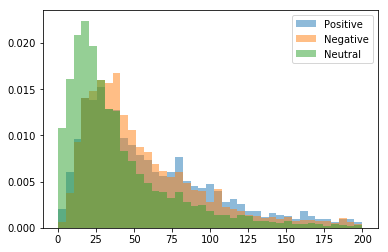

In [28]:
bins = np.linspace(0, 200, 40)

plt.hist(fullcorpusI[fullcorpusI['label'] == 'Positive']['body_length'], bins, alpha=0.5, density=True, label='Positive')
plt.hist(fullcorpusI[fullcorpusI['label'] == 'Negative']['body_length'], bins, alpha=0.5, density=True, label='Negative')
plt.hist(fullcorpusI[fullcorpusI['label'] == 'Neutral']['body_length'], bins, alpha=0.5, density=True, label='Neutral')
plt.legend(loc='upper right')

# Machine Learning Models: Random Forest

**Benefits of Random forest**

* Versatile: Can be used for regression and classification types problems
* Easily handles outliers and missing values
* Can handle various types of inputs, continuous or ordinal 
* Outputs feature importance

In [31]:
print(dir(RandomForestClassifier))

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_estimator_type', '_get_param_names', '_get_tags', '_make_estimator', '_more_tags', '_required_parameters', '_set_oob_score', '_validate_X_predict', '_validate_estimator', '_validate_y_class_weight', 'apply', 'decision_path', 'feature_importances_', 'fit', 'get_params', 'predict', 'predict_log_proba', 'predict_proba', 'score', 'set_params']


In [32]:
print(RandomForestClassifier())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


## Explore RandomForestClassifier through Cross-Validation

In [33]:
rf = RandomForestClassifier(n_jobs=-1)
# njobs=-1 allows decision trees to be built in parallel and allows for faster processing

In [34]:
k_fold = KFold(n_splits=5)

In [35]:
X_features = pd.concat([fullcorpusI['body_length'], fullcorpusI['punct%'], pd.DataFrame(X_tfidf.toarray())], axis=1)

In [41]:
X_features.head(200)

,body_length,punct%,0,1,2,3,4,5,6,7,...,33253,33254,33255,33256,33257,33258,33259,33260,33261,33262
0,73,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9,11.1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,16,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,15,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,18,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,11,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,47,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,80,2.5,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
cross_validate(rf, X_features, fullcorpusI['label'], cv=k_fold, scoring='accuracy', n_jobs=-1, 
               return_train_score=True)

{'fit_time': array([174.14920974, 173.53097892, 172.88462377, 173.95410895,
        171.75943899]),
 'score_time': array([3.15057421, 3.037287  , 3.32805228, 3.08976698, 4.0080409 ]),
 'test_score': array([0.10331191, 0.28744439, 0.46811666, 0.44414236, 0.50828183]),
 'train_score': array([0.98683804, 0.98634369, 0.9844281 , 0.9826361 , 0.98399654])}

## Explore RandomForestClassifier through a holdout set

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_features, fullcorpusI['label'], test_size=0.2)

In [46]:
print(X_test.columns)

Index(['body_length',      'punct%',             0,             1,
                   2,             3,             4,             5,
                   6,             7,
       ...
               33253,         33254,         33255,         33256,
               33257,         33258,         33259,         33260,
               33261,         33262],
      dtype='object', length=33265)


In [47]:
rf = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)
rf_model = rf.fit(X_train, y_train)

In [48]:
print(rf_model)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [49]:
sorted(zip(rf_model.feature_importances_, X_train.columns), reverse=True)[0:10]

[(0.05454660994932071, 'body_length'),
 (0.019396279717667542, 0),
 (0.018371796684460078, 8779),
 (0.01752643297452772, 16895),
 (0.015075779245478553, 15985),
 (0.014107310206218505, 17133),
 (0.013981418490636686, 1027),
 (0.013163495049138042, 1885),
 (0.013134696088879605, 'punct%'),
 (0.011371059602831635, 2025)]

In [47]:
y_pred = rf_model.predict(X_test)

In [48]:
precision, recall, fscore, support = score(y_test, y_pred, pos_label='Negative', average='micro') 
# When the labels are not binary (0 or 1) such as in this case our labels are ham or spam, we need to tell the 
# model what we want to it predict. Meaning our positive label will be 'spam'. So it can predict 'spam' labels.

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1052: UserWarning: Note that pos_label (set to 'Negative') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [49]:
print(precision, recall, fscore, support)

0.4849233811171527 0.4849233811171527 0.4849233811171527 None


In [50]:
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3),
                                                         round(recall, 3),
                                                         round((y_pred == y_test).sum()/len(y_pred), 3)))

Precision: 0.485 / Recall: 0.485 / Accuracy: 0.485


# Building Machine Learning Classifiers: Explore Random Forest model with grid search 

**Grid Search**: Building a grid of hyper-parameter settings, and then exploring a model fit with each of those 
                 hyper-parameters settings.

## Build your own grid search

In [51]:
def train_RF(n_est, depth):
    rf = RandomForestClassifier(n_estimators=n_est, max_depth=depth, n_jobs=-1)
    rf_model = rf.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    precision, recall, fscore, support = score(y_test, y_pred, average='weighted')
    print('Estimators: {} / Depth: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
           n_est, depth, round(precision,3), round(recall,3), round(fscore,3), 
           round((y_test == y_pred).sum()/len(y_test),3)))

In [52]:
for n_est in [10, 50, 100]:
    for depth in [10, 20, 30, None]:
        train_RF(n_est, depth)

Estimators: 10 / Depth: 10 ---- Precision: 0.592 / Recall: 0.456 / Accuracy: 0.315
Estimators: 10 / Depth: 20 ---- Precision: 0.594 / Recall: 0.497 / Accuracy: 0.407
Estimators: 10 / Depth: 30 ---- Precision: 0.591 / Recall: 0.528 / Accuracy: 0.462
Estimators: 10 / Depth: None ---- Precision: 0.598 / Recall: 0.593 / Accuracy: 0.578
Estimators: 50 / Depth: 10 ---- Precision: 0.655 / Recall: 0.449 / Accuracy: 0.296
Estimators: 50 / Depth: 20 ---- Precision: 0.653 / Recall: 0.486 / Accuracy: 0.373
Estimators: 50 / Depth: 30 ---- Precision: 0.666 / Recall: 0.523 / Accuracy: 0.441
Estimators: 50 / Depth: None ---- Precision: 0.633 / Recall: 0.619 / Accuracy: 0.599
Estimators: 100 / Depth: 10 ---- Precision: 0.65 / Recall: 0.444 / Accuracy: 0.285
Estimators: 100 / Depth: 20 ---- Precision: 0.666 / Recall: 0.484 / Accuracy: 0.37
Estimators: 100 / Depth: 30 ---- Precision: 0.65 / Recall: 0.516 / Accuracy: 0.429
Estimators: 100 / Depth: None ---- Precision: 0.65 / Recall: 0.633 / Accuracy: 0.61

# Building Machine Learning Classifiers: Evaluate Random Forest with GridSearchCV

Grid Search: Exhaustively search all parameter combinations in a given grid to determine the best model.

Cross-validation: Divide a dataset into k subsets and repeat the holdout method k times where a different subset is used as the holdout set in each iteration.

In [ ]:
rf = RandomForestClassifier()
param = {'n_estimators': [10, 150, 300], 
         'max_depth': [30, 60, 90, None]}

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(X_tfidf_feat, fullcorpusI['label'])
pf.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [ ]:
rf = RandomForestClassifier()
param = {'n_estimators': [10, 150, 300], 
         'max_depth': [30, 60, 90, None]}

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(X_tfidf_feat, fullcorpusI['label'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


GrisSearchCV is failing with "out of memory" error. I will continue to use my own grid search method. 

# Building Machine Learning Classifiers: Explore Gradient Boosting model with grid search

In [51]:
print(GradientBoostingClassifier())

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)


## Build your own Gradient Boosting Model 

In [53]:
def train_GB(est, max_depth, lr):
    gb = GradientBoostingClassifier(n_estimators=est, 
                                    max_depth=max_depth, 
                                    learning_rate=lr)
    gb_model = gb.fit(X_train, y_train)
    y_pred = gb_model.predict(X_text)
    precision, recall, fscore, support = score(y_test, y_pred, average = 'weighted')
    print('Estimators: {} / Depth: {} / Learning Rate: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
           n_est, depth, lr, round(precision,3), round(recall,3), round(fscore,3), 
           round((y_test == y_pred).sum()/len(y_test),3)))

In [ ]:
for n_est in [50, 100, 150]:
    for max_depth in [3, 7, 11, 15]:
        for lr in [0.01, 0.1, 1]:
            train_GB(n_est, max_depth, lr)

# Using ML models adopted from https://github.com/dipanjanS/practical-machine-learning-with-python/blob/master/notebooks/Ch07_Analyzing_Movie_Reviews_Sentiment/Sentiment%20Analysis%20-%20Supervised.ipynb

## Feature Engineering

In [51]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [57]:
fullcorpusI.head()

,body_text,label,body_text_clean,body_text_tokenize,body_length,punct%
0,Sai kha ya her kisi kay bus ki bat nhi hai lakin main ki hal kal bi Aj aur aj bi sirf Aus say bus,Positive,Sai kha ya her kisi kay bus ki bat nhi hai lakin main ki hal kal bi Aj aur aj bi sirf Aus say bus,"[Sai, kha, ya, her, kisi, kay, bus, ki, bat, nhi, hai, lakin, main, ki, hal, kal, bi, Aj, aur, a...",73,0.0
1,sahi bt h,Positive,sahi bt h,"[sahi, bt, h]",7,0.0
2,"Kya bt hai,",Positive,Kya bt hai,"[Kya, bt, hai]",9,11.1
3,Wah je wah,Positive,Wah je wah,"[Wah, je, wah]",8,0.0
4,Are wha kaya bat hai,Positive,Are wha kaya bat hai,"[Are, wha, kaya, bat, hai]",16,0.0


In [58]:
reviews = np.array(fullcorpusI['body_text'])
sentiments = np.array(fullcorpusI['label'])

In [61]:
reviews.shape, sentiments.shape

((20229,), (20229,))

In [72]:
# build train and test datasets
train_reviews = reviews[:16183]
train_sentiments = sentiments[:16183]
test_reviews = reviews[16183:]
test_sentiments = sentiments[16183:]

In [73]:
train_reviews.shape, test_reviews.shape

((16183,), (4046,))

In [74]:
train_sentiments.shape, test_sentiments.shape

((16183,), (4046,))

In [127]:
test_df = fullcorpusI['label'].iloc[16183:]

In [128]:
test_df.shape

(4046,)

In [132]:
test_df = pd.DataFrame({'Label': test_sentiments[:]})

In [140]:
test_df.shape

(4046, 1)

In [139]:
test_df.loc[test_df['Label'] == 'Neutral'].count()

Label    1546
dtype: int64

In [141]:
test_df.loc[test_df['Label'] == 'Negative'].count()

Label    1510
dtype: int64

In [142]:
test_df.loc[test_df['Label'] == 'Positive'].count()

Label    990
dtype: int64

In [75]:
# Building count vectorizer feature vector
cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0, ngram_range=(1,2))
cv_train_features = cv.fit_transform(train_reviews)

In [76]:
# Building tfidf vectorizer feature vector
tv = TfidfVectorizer(use_idf=True, min_df=0.0, max_df=1.0, ngram_range=(1,2),
                     sublinear_tf=True)
tv_train_features = tv.fit_transform(train_reviews)

In [77]:
# transform test reviews into features
cv_test_features = cv.transform(test_reviews)
tv_test_features = tv.transform(test_reviews)

In [78]:
print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)
print('TFIDF model:> Train features shape:', tv_train_features.shape, ' Test features shape:', tv_test_features.shape)

BOW model:> Train features shape: (16183, 161347)  Test features shape: (4046, 161347)
TFIDF model:> Train features shape: (16183, 161347)  Test features shape: (4046, 161347)


## Model training, prediction, and performance evaluation

In [94]:
lr = LogisticRegression(max_iter=100, C=1)
svm = SGDClassifier(loss='hinge', n_iter=100)

In [95]:
def train_predict_model(classifier, 
                        train_features, train_labels, test_features, test_labels):
    # build model
    classifier.fit(train_features, train_labels)
    # predict using the model
    predictions = classifier.predict(test_features)
    return predictions

In [96]:
# Logistic Regression model on urdu dataset features
lr_predictions = train_predict_model(classifier=lr, 
                                     train_features=cv_train_features, train_labels=train_sentiments,
                                     test_features=cv_test_features, test_labels=test_sentiments)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  return solver


In [113]:
def display_confusion_matrix(true_labels, predicted_labels, classes=[1,0]):
    
    total_classes = len(classes)
    level_labels = [total_classes*[0], list(range(total_classes))]

    cm = metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels, 
                                  labels=classes)
    cm_frame = pd.DataFrame(data=cm, 
                            columns=pd.MultiIndex(levels=[['Predicted:'], classes], 
                                                  labels=level_labels), 
                            index=pd.MultiIndex(levels=[['Actual:'], classes], 
                                                labels=level_labels)) 
    print(cm_frame) 

In [106]:
def get_metrics(true_labels, predicted_labels):
    
    print('Accuracy:', np.round(
                        metrics.accuracy_score(true_labels, 
                                               predicted_labels),
                        4))
    print('Precision:', np.round(
                        metrics.precision_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('Recall:', np.round(
                        metrics.recall_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('F1 Score:', np.round(
                        metrics.f1_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))

In [115]:
def display_model_performance_metrics(true_labels, predicted_labels, classes=[1,0]):
    print('Model performance metrics:')
    print('-'*30)
    get_metrics(true_labels=true_labels, predicted_labels=predicted_labels)
    
    print('\nPredicting confusion matrix:')
    print('-'*30)
    display_confusion_matrix(true_labels=true_labels, predicted_labels=predicted_labels, classes=classes)

In [116]:
display_model_performance_metrics(true_labels=test_sentiments, 
                                  predicted_labels=lr_predictions,
                                  classes=['Positive', 'Negative'])

Model performance metrics:
------------------------------
Accuracy: 0.5724
Precision: 0.6344
Recall: 0.5724
F1 Score: 0.5502

Predicting confusion matrix:
------------------------------
                 Predicted:         
                   Positive Negative
Actual: Positive        462       72
        Negative        124      497


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  if sys.path[0] == '':


# Deep Learning Models

In [37]:
from keras.models import Sequential
from keras import layers

Using TensorFlow backend.


In [49]:
input_dim = X_train.shape[1] #Number of features

In [50]:
print(input_dim)

33265


## Encoding the target variable

In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [47]:
from keras.utils.np_utils import to_categorical
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)
y_train_oh = to_categorical(y_train_le)
y_test_oh = to_categorical(y_test_le)

In [57]:
model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(4, activation='sigmoid'))

In [58]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                332660    
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 44        
Total params: 332,704
Trainable params: 332,704
Non-trainable params: 0
_________________________________________________________________


In [59]:
history = model.fit(X_train, y_train_oh, 
                    epochs=100, 
                    verbose=False,
                    validation_data=(X_test, y_test_oh),
                    batch_size=10)

In [60]:
loss, accuracy = model.evaluate(X_train, y_train_oh, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test_oh, verbose=False)
print("Testing accuracy: {:.4f}".format(accuracy))

Training Accuracy: 0.9989
Testing accuracy: 0.8013


In [61]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [64]:
def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc)+1)
    
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(x, acc, 'b', label='Training accuracy')
    plt.plot(x, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

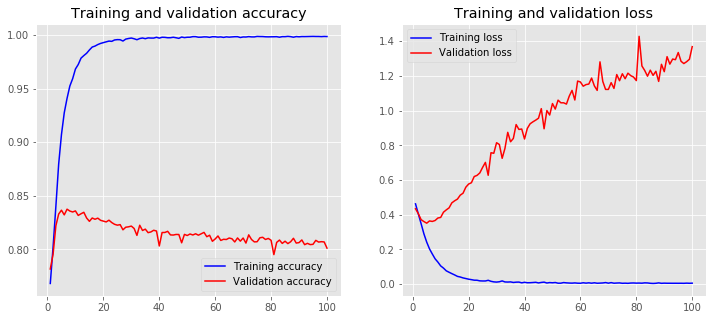

In [65]:
plot_history(history)

Model has started to overfit around epoch=40 since accuracy reaches close to 100%. A good way to see when the model starts overfitting is when loss of the validation data starts rising again. This is good time to stop the model. This particular model only requires 20 epochs.  